# Meteoroids planet fall - data synthesis
Data synthesis as the assignment project for Programming for Data Analysis, GMIT 2019

Lecturer: dr Brian McGinley

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 18-11-2019

This Notebook should be read in conjunction with the corresponding README.md file at the project [repository](https://github.com/andkoc001/data_synthesis.git) at GitHub.

___

## Introduction

### Problem statement and project objectives

Purpose: **To generate (synthesise) a dataset that simulate the phenomenon of meteoroids fall on a planet.**


### The phenomenon

Meteorite planet fall is a commonplace phenomenon in nature. It occurs when certain astronomical objects (meteorites) hit a planet (or similar object). It is believed it is a universal occurrence in planetary systems, especially intensive during its formation. 

![Impact craters on Mimas' surface (Saturn’s moon)](https://upload.wikimedia.org/wikipedia/commons/d/da/Mimas_moon.jpg)
Source: [Wikipedia](https://en.wikipedia.org/wiki/File:Mimas_moon.jpg)

~~The scenario and data are both fictional, invented solely for the purpose of this project.~~ The data presented in the notebook is real and true. However, as it illustrates the situation in an undiscovered solar system in a galaxy far, far away, and is hard to prove it, please assume the data presented here is fictional.

### Key terminology
| Term | Description   |
|------|------|
|~~Ephemery~~|~~trajectory of astronomical objects~~|
|Meteor|meteoroids passing the atmosphere and burning in the process|
|Meteorite|meteoroid that survived the transit through the atmosphere and hit the ground|
|Meteoroid|object of certain size traveling in outer space (beyond the atmosphere of a planet)|

### Simplifications and assumptions

Note: this project is a _simplified model_ in terms of factors considered, relationship between them and terminology describing the phenomenon.

There is a large number of factors affecting the phenomenon. Many of them affect each other, so that the circumstances may appear random and chaotic (see Wikipedia entry on [chaos theory](https://en.wikipedia.org/wiki/Chaos_theory)).

While designing and developing this simulation, I have made a number of assumptions. Some of them include, inter alia:
- A planetary system is subject to celestial mechanics, and is similar enough to our Solar System.
- The planet in question is of a rocky type and has an atmosphere (which properties are negligible).
- The number of meteorites in the local space is very large, that is running out of the meteories is not considered.
- Units of measurement are arbitrary. 

Meteoroids planet fall is a highly complex phenomenon than captured in this model. There are a great many factors relevant to the simulation, but were not considered for simplicity only. For example: the age and structure of the solar system, the size and density of the planet, the atmosphere thickness, chemical composition of the meteoroids, etc. I believe that the variables chosen for the model reflect the idea of the phenomenon and data synthesised by the simulation reflects its feature adequately.


___
## Data categories and types

I have chosen to consider and include in my simulation the following several variables:
* `Year` - time series of observation period - duration of a _local_ year.
* `Entry`- Number of the atmosphere entry, that is an event when a meteoroid gets in contact with the atmosphere. The meteoroids can then either a) hit the planet, b) burn out completely (due to fraction) while passing the atmosphere, c) skim the atmosphere without hitting the planet surface and continue the fly.
* `Impact` - number of the meteoroids that survived the transit through the atmosphere (did not burned out completely) and hit the planet surface.
* `Mass` - an idealised measure describing the size of the meteoroid; only those hitting the surface were considered.
* `Velocity` - relative speed of the meteoroid when it reached the planet's surface; only those hitting the surface were considered.
* `Crater` - size of the impact crater caused by the falling meteorite - it is a measure of the energy released during the collision; in this simulation I assumed it is a function of the _mass_ and _velocity_ of the meteoroid. NB. only one, the _highest energy_, meteorite in a given year is taken into account for evaluating this variable. _Energy_ is calculated using an invented formula that depends on the meteorite's mass and velocity - not recorded in the dataset.
* `Class` - meteoroids in my simulation can be of one of the three classes: _metallic_, _rocky_ or _icy_ - selected arbitrarily (in reality, “meteorites are divided into three main groups: irons, stones and stony-irons” - https://geology.com/meteorites/meteorite-types-and-classification.shtml). NB. only one, the _highest energy_, meteorite in a given year is taken into account for evaluating this variable.

These variables will be discussed in greater detail below.

___
## Importing Python libraries

The following Python libraries were used in synthesising the dataset variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

I have chosen to define seeds for numPy random methods. That means each time the Notebook and particular cells are run, results will be the same.
In order to generate new random results, reset the kernel and run the Notebook cells except for the one below (which sets the seed values).

In [2]:
my_seed = 2019  # seed value pre-set, selected arbitrarily
np.random.seed(my_seed) 

___
## Generating the data

In [3]:
# creation of empty data (just headings)
data = pd.DataFrame(columns = ["Year", "Entry", "Impact", "Mass", "Velocity", "Crater", "Class"]) 

# data.head() # for testing

### Observation period and intervals

Observations are recorded in one year intervals over a period of 100 local years (for the planet in question). This will be assigned to variable `year`.

In [4]:
year = np.arange(1, 1001) # number of observations (= the second number - the first number)

In [5]:
# assigning year values to the data array, other columns with empty values (NaN - not a number)
data["Year"] = year
# data.head(2)

### Atmosphere entry

Number of significant (that means those being recorded) meteors' entries to the atmosphere of the planet, represented by variable `atm_entry`, in my model is considered unpredictable event and of a chaotic nature (significant random noise). It is assumed that in a given year there may be _none_ to _a very large number_ of entries, with a certain mean number. This will be represented by a **Poisson distribution**. The reason for choosing this distribution is to capture the fact of lesser probability of a larger number of meteors entering the planet's atmosphere.

The lambda value assigned randomly again, to strengthen the effect of the chaotic nature of the phenomenon. (More about randomness of the lambda values - why and how).

In [6]:
np.random.seed(my_seed) # executing this line ensures the numbers ranomly generated are the same

# defines lambda value for the poisson distribution
atm_entry_lambda = np.random.random() + np.random.randint(2, 4) # expected mean value - it gives a general shape of the distribution
print(atm_entry_lambda)

# defines noise used to modify the results
atm_entry_noise = np.random.randint(-1500, -500) # extra random noise - expands the range of possible results and adds randomness and increases the standard deviation
print(atm_entry_noise)

3.9034822144192742
-695


In [7]:
np.random.seed(my_seed) # executing this line ensures the numbers ranomly generated are the same

# the algorithm with nested random variables - poisson distribution
# the intention is to have low mean and high std dev. values - verry erratic and chaotic phenomenon
# consulted reference: https://stackoverflow.com/a/35730154
atm_entry = abs(np.random.poisson(abs(atm_entry_lambda + (atm_entry_noise)), len(year)) + atm_entry_noise) # higher probability of occuring fewer meteors entry in a year; only non-negative values



#### Analysis of the atmosphere entries 

min:	 0
mean:	 21.32
max:	 92
std div: 15.831159148969478


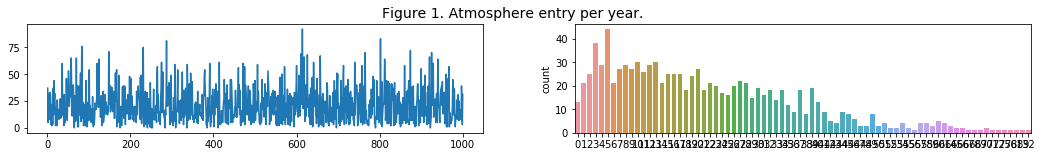

In [8]:
# description of the generated data
#print("atm_entry_lambda:\t", atm_entry_lambda)
#print("atm_entry_noise:\t", atm_entry_noise)
print("min:\t", atm_entry.min())
print("mean:\t", atm_entry.mean())
print("max:\t", atm_entry.max())
print("std div:", atm_entry.std())

### plotting - 
fig, ax = plt.subplots(ncols=2, figsize=(18, 2))
plt.suptitle("Figure 1. Atmosphere entry per year.", y=1.0, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=None)

# left hand plot - number of entries in each year of observation
sns.lineplot(x=year, y=atm_entry, ax=ax[0]) 

# right hand plot - how many the same number of entries occured
sns.countplot(x=atm_entry, ax=ax[1])   

plt.show()

In [9]:
#print("Number of meteroids hitting the atmosphere, list in sequence of years:\n", atm_entry)
print("\nOccurrences (what numbers happend to be generated):\n", np.unique(set(atm_entry)))

# Assigning the variables
unique_elements, counts_elements = np.unique(atm_entry, return_counts=True) # https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php

print("\nFrequency of unique values, sorted (first value denotess number of occurrences, second denotes how many time the number occured in all the observations.):\n", np.asarray((unique_elements, counts_elements)))

# print results - number of yearly hits distribution
hits = pd.DataFrame(np.transpose(np.asarray((unique_elements, counts_elements))))
hits.columns = ['Unique values', 'Counter']
hits


Occurrences (what numbers happend to be generated):
 [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 81, 83, 92}]

Frequency of unique values, sorted (first value denotess number of occurrences, second denotes how many time the number occured in all the observations.):
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 49 50 51 52 53 54 55 56 57 58 59 60 61 64 65 66 67 68 69 70 71 72 75
  76 81 83 92]
 [13 21 25 38 29 44 21 27 29 27 30 26 29 30 21 25 25 25 18 24 27 18 21 20
  17 16 20 22 21 15 19 16 18 14 18 12  9 18  8 19 13  9  5  4  9  8  6  3
   3  8  3  4  2  2  4  2  1  4  4  3  5  4  3  2  2  1  1  1  2  1  1  1
   1  1  1  1]]


,Unique values,Counter
0,0,13
1,1,21
2,2,25
3,3,38
4,4,29
...,...,...
71,75,1
72,76,1
73,81,1
74,83,1


##### Adding `Entry` values to the dataset.

In [10]:
data["Entry"] = atm_entry # abs(np.random.poisson(abs(atm_entry_lambda + abs(atm_entry_noise)), len(year)) + atm_entry_noise)

### Surface impact

Number of meteors impacts into the planet surface, that is the meteors that entered the atmosphere of the planet and penetrated it without being completely burned out in the transit. 
The variable is represented in my model by variable `Impact` which is a result of **binomial distribution** with arbitrarily given probability of success. This is simplification, as a lot of factors are neglected here that would have an effect in real situation (e.g. size, density, composition, velocity, angle of entry, atmosphere properties and so on).

This part is based on Ian Mcloughlin's [Notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/coin-flip.ipynb) on coin flip.

In [11]:
np.random.seed(my_seed) # executing this line ensures the numbers ranomly generated are the same

# assign probability of meteoroids passing through the atmosfere and hitting the surface
passing_prob = 0.01*np.random.randint(5, 21) # range from 0.05 to 0.2
passing_prob

0.13

In [27]:
# filtering the meteoroids - testing how many in each year have passed through the atmosphere

print("Results for a few first observations:\n")

# for each year
for index, row in data.iterrows(): # adapted from https://stackoverflow.com/a/16476974
    #print("\n")
    
    sum = 0 # counter of meteoites successfully passing the atmosphere in a given year
    
    for i in range(data.iat[index, 1]): # data.iat[-1, 1] returns value of a cell
       
        # testing for a single instance (Number of tests, probability of a penetration, number of times to do this);
        passed = np.random.binomial(1, passing_prob, 1) # adapted from https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/coin-flip.ipynb
        sum = int(sum + passed)
    
    if index <= 5: # print out for first couple of obsevations
        print("Year:", index+1) #, "\tNumber of meteo:\t", row["Entry"])
        print("Number of meteorites passing the atmosphere and hitting the planet / total number entering the atmosphere:\t", sum, "/", row["Entry"], "\n")
    
    if row["Entry"] != 0: # check if there was any meteo hittint the atmosphere in a given year
        ratio_passing = sum/row["Entry"]
        
    else:
        ratio_passing = 0  
    
    # assign number of surface impacts in a year to the main dataset
    data.iat[index, 2] = sum 

Results for a few first observations:

Year: 1
Number of meteorites passing the atmosphere and hitting the planet / total number entering the atmosphere:	 6 / 37 

Year: 2
Number of meteorites passing the atmosphere and hitting the planet / total number entering the atmosphere:	 0 / 5 

Year: 3
Number of meteorites passing the atmosphere and hitting the planet / total number entering the atmosphere:	 3 / 32 

Year: 4
Number of meteorites passing the atmosphere and hitting the planet / total number entering the atmosphere:	 0 / 12 

Year: 5
Number of meteorites passing the atmosphere and hitting the planet / total number entering the atmosphere:	 9 / 32 

Year: 6
Number of meteorites passing the atmosphere and hitting the planet / total number entering the atmosphere:	 1 / 8 



In [13]:
data

,Year,Entry,Impact,Mass,Velocity,Crater,Class
0,1,37,1,NaN,NaN,NaN,NaN
1,2,5,1,NaN,NaN,NaN,NaN
2,3,32,3,NaN,NaN,NaN,NaN
3,4,12,1,NaN,NaN,NaN,NaN
4,5,32,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
995,996,8,1,NaN,NaN,NaN,NaN
996,997,39,3,NaN,NaN,NaN,NaN
997,998,27,6,NaN,NaN,NaN,NaN
998,999,3,0,NaN,NaN,NaN,NaN


### Parameters of each meteor

The mass and velocity of **every** meteors hitting the planet surface in given year is generated in the model - other are not considered in the dataset.

The mass and velocity is stored in a separate subset of data for each year (3rd dimension of the original dataset?).

#### Mass of the meteoroids

The mass of the meteor is distributed according to pareto principle, that is many small meteors and few large. The variable is generated with the help of `np.random.pareto()` function.

Assigning pareto distibution parameters

In [14]:
# adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.pareto.html

# parameters for pareto dirstribution: pareto_a - shape of the distribution, pareto_m - mode of the distribution

mass_pareto_a, mass_pareto_m = 1.0, 1000.0  # shape and mode - picked arbitrarily to resemble reality as much as the author could think

# shape of the pareto distribution determines the how much the number of small meteors would dominate over the large ones; greater the shape value, the more small samples
# mode in the pareto distribution tells the magnitude (or scale) of the outcome (the size of the metors); the larger the mode, the larger the scale of the meteors

In [30]:
np.random.seed(my_seed) # executing this line ensures the numbers ranomly generated are the same

print("Results for a few first observations:\n")

# splicing - getting the number of meteors entering the atmosphere in a given year
for i in data["Year"]:
    
    number_meteors = data.loc[i-1]["Impact"] # getting the number of the meteors entereing the atmosphere in the subsequnt year
    
    if i <= 5: print("In year", i, "the number of meteors passing the atmosphere was:\t", number_meteors)
   
    if number_meteors != 0:  # only those that hit the planet are considered
        
        # genertating mass of each meteoroid
        mass_meteo = np.round((0.01*(np.random.pareto(mass_pareto_a, number_meteors) + 1) * mass_pareto_m) + 0.01*np.random.randint(-1000, 10), 0) # random mass for each meteoroid hitting the surface
        
        # recording the masses in the dataset table
        data.at[i-1, "Mass"] = mass_meteo
        
        if i <= 5: print("Their mass was as follows:", data.at[i-1, "Mass"], "\n")
        #print(data)
        
    else:
        #print() 
        pass

Results for a few first observations:

In year 1 the number of meteors passing the atmosphere was:	 6
Their mass was as follows: [94.  7. 17. 18. 74.  4.] 

In year 2 the number of meteors passing the atmosphere was:	 0
In year 3 the number of meteors passing the atmosphere was:	 3
Their mass was as follows: [17. 89. 30.] 

In year 4 the number of meteors passing the atmosphere was:	 0
In year 5 the number of meteors passing the atmosphere was:	 9
Their mass was as follows: [ 18.  13.  12.  90.  12. 654.  10.  20.  12.] 



#### Velocity of the meteoroids

The velocity of the meteor is distributed according to pareto principle, that is many small meteors and few large. The variable is generated with the help of `np.random.pareto()` function.

Assigning pareto distibution parameters

In [16]:
# adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.pareto.html

# parameters for pareto dirstribution: pareto_a - shape of the distribution, pareto_m - mode of the distribution

velo_pareto_a, velo_pareto_m = 1.4, 5000.0  # shape and mode - picked arbitrarily to resemble reality as much as the author could think

# shape of the pareto distribution determines the how much the number of slow meteoroids would dominate over the fast ones; greater the shape value, the more slow samples
# mode in the pareto distribution tells the magnitude (or scale) of the outcome (the velocity of the metoroids); the larger the mode, the larger the velocity of the meteors

In [17]:
np.random.seed(my_seed) # executing this line ensures the numbers ranomly generated are the same

# splicing - getting the number of meteors entering the atmosphere in a given year
for i in data["Year"]:
    
    number_meteors = data.loc[i-1]["Impact"] # getting the number of the meteors entereing the atmosphere in the subsequnt year
    
    if i <= 5: print("In year", i, "the number of meteors passing the atmosphere was:\t", number_meteors) # print out for first couple of obsevations
       
    if number_meteors != 0:  # only those that hit the planet are considered
        
        # generating velocity value for each meteo
        velo = np.round((0.01*(np.random.pareto(velo_pareto_a, number_meteors) + 1) * velo_pareto_m) + 0.01*np.random.randint(-1000, 10), 0) # random mass for each meteoroid hitting the surface
        
        # assigning the velo values to the dataset
        data.at[i-1, "Velocity"] = velo
        
        if i <= 5: print("Their mass was as follows:", data.at[i-1, "Velocity"], "\n") # print out for first couple of obsevations
                
    #else:
        #print()
    #    pass

In year 1 the number of meteors passing the atmosphere was:	 1
Their mass was as follows: [257.] 

In year 2 the number of meteors passing the atmosphere was:	 1
Their mass was as follows: [77.] 

In year 3 the number of meteors passing the atmosphere was:	 3
Their mass was as follows: [ 93. 218.  55.] 

In year 4 the number of meteors passing the atmosphere was:	 1
Their mass was as follows: [72.] 

In year 5 the number of meteors passing the atmosphere was:	 2
Their mass was as follows: [111.  51.] 



#### Picking the highest energy meteoride 

In [18]:
np.random.seed(my_seed) # executing this line ensures the numbers ranomly generated are the same

# Calculation of the meteoroids energy
for i in data["Year"]:
    
    if data.loc[i-1]["Impact"] != 0:
        #print(data.loc[i-1]["Mass"], "*", data.loc[i-1]["Velocity"], "=", (data.loc[i-1]["Mass"] * data.loc[i-1]["Velocity"]))
        
        # calculation energy for each meteroid hitting the planet
        energy_calcs = np.round(.001 * data.loc[i-1]["Mass"] * data.loc[i-1]["Velocity"], 1)
        
        # recording only the highest energy metoroid in the dataset
        data.at[i-1, "Crater"] = max(energy_calcs)
        
        
        #data.at[i-1, "Crater"] = max(np.round(.001 * data.loc[i-1]["Mass"] * data.loc[i-1]["Velocity"], 1)) # only max energy meteroid recorded
        #print(data.loc[i-1]["Crater"])
                
    else:
         pass
        
#print(data.loc[i-1]["Crater"])
    #for j in data["Year"]:
    
    #number_meteors = data.loc[i-1]["Impact"] # getting the number of the meteors entereing the atmosphere in the subsequnt year
    #print("In year", i, "the number of meteors passing the atmosphere was:\t", number_meteors, "\nTheir mass was as follows:")
   
    #if number_meteors != 0:
    #    data.at[i-1, "Velocity"] = np.round(((np.random.pareto(velo_pareto_a, number_meteors) + 1) * velo_pareto_m) + np.random.randint(-1000, 10), 0) # random mass for each meteoroid hitting the surface
    #    print(data.at[i-1, "Velocity"], "\n")
    #    #print(data)
    #else:
    #    data.at[i-1, "Velocity"] = 0   
data

,Year,Entry,Impact,Mass,Velocity,Crater,Class
0,1,37,1,[95.0],[257.0],24.4,NaN
1,2,5,1,[13.0],[77.0],1,NaN
2,3,32,3,"[18.0, 74.0, 4.0]","[93.0, 218.0, 55.0]",16.1,NaN
3,4,12,1,[15.0],[72.0],1.1,NaN
4,5,32,2,"[30.0, 10.0]","[111.0, 51.0]",3.3,NaN
...,...,...,...,...,...,...,...
995,996,8,1,[11.0],[53.0],0.6,NaN
996,997,39,3,"[19.0, 43.0, 25.0]","[87.0, 146.0, 103.0]",6.3,NaN
997,998,27,6,"[124811.0, 11.0, 40.0, 21.0, 19.0, 35.0]","[42155.0, 60.0, 138.0, 89.0, 82.0, 126.0]",5.26141e+06,NaN
998,999,3,0,NaN,NaN,NaN,NaN


### Class of the highest energy meteoroid

In the solar system there are following classes of meteoroids:
* iron,
* stone,
* ice.

Each class has a certain probability of hitting the planet - see below.

In [19]:
# in the solar system occure the following classes of meteorids as well as their corresponding probability of occurance
classes, class_probability = ("iron", "stone", "ice"), (0.8, 0.15, 0.05) # tuple data types, so that the order matters

In [20]:
np.random.seed(my_seed) # executing this line ensures the numbers ranomly generated are the same

for i in data["Year"]:
    
    if data.loc[i-1]["Impact"] != 0: # on condition there was an impact in this year
        
        # assigning the class in given year
        data.at[i-1, "Class"] = np.random.choice(classes, p=class_probability)
        
    else:
         pass

In [21]:
data

,Year,Entry,Impact,Mass,Velocity,Crater,Class
0,1,37,1,[95.0],[257.0],24.4,stone
1,2,5,1,[13.0],[77.0],1,iron
2,3,32,3,"[18.0, 74.0, 4.0]","[93.0, 218.0, 55.0]",16.1,iron
3,4,12,1,[15.0],[72.0],1.1,iron
4,5,32,2,"[30.0, 10.0]","[111.0, 51.0]",3.3,stone
...,...,...,...,...,...,...,...
995,996,8,1,[11.0],[53.0],0.6,iron
996,997,39,3,"[19.0, 43.0, 25.0]","[87.0, 146.0, 103.0]",6.3,stone
997,998,27,6,"[124811.0, 11.0, 40.0, 21.0, 19.0, 35.0]","[42155.0, 60.0, 138.0, 89.0, 82.0, 126.0]",5.26141e+06,stone
998,999,3,0,NaN,NaN,NaN,NaN


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Year        1000 non-null int64
Entry       1000 non-null int64
Impact      1000 non-null object
Mass        812 non-null object
Velocity    812 non-null object
Crater      812 non-null object
Class       812 non-null object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [23]:
data.describe()

,Year,Entry
count,1000.000000,1000.000000
mean,500.500000,21.320000
std,288.819436,15.839081
min,1.000000,0.000000
25%,250.750000,9.000000
50%,500.500000,18.000000
75%,750.250000,31.000000
max,1000.000000,92.000000


![Localised impact craters field?](https://d1ix0byejyn2u7.cloudfront.net/drive/images/uploads/headers/ws_cropper/1_0x0_1410x520_0x520_potholes.jpg)
Source: [RAC](https://www.rac.co.uk/drive/advice/road-safety/report-a-pothole/)

___
Andrzej Kocielski